# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf
import numpy as np

E:\Continuum\anaconda3\envs\tf2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

ModuleNotFoundError: No module named 'tensorflow.examples'

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

### Visualizing the Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Create the Model

In [4]:
#x = tf.placeholder(tf.float32,shape=[None,784])
x=tf.Variable()

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [6]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [7]:
b = tf.Variable(tf.zeros([10]))

In [8]:
# Net input function
y = tf.matmul(x,W) + b

Loss and Optimizer

In [9]:
y_true = tf.compat.v1.placeholder(tf.float32,[None,10])

In [10]:
# Define loss function

In [11]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits(labels=tf.stop_gradient(y_true), logits=y)
loss_function = tf.reduce_mean(input_tensor=individual_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.5)

In [13]:
train = optimizer.minimize(loss_function)

### Create Session

In [14]:
init = tf.compat.v1.global_variables_initializer()

In [15]:
sess=tf.compat.v1.Session()

sess.run(init)

In [16]:
# Train the model for 1000 steps on the training set
# Using built in batch feeder from mnist for convenience

for step in range(1000):
    batch_x , batch_y = mnist.train.next_batch(100)

    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

# Test the Train Model

matches = tf.equal(tf.argmax(input=y,axis=1),tf.argmax(input=y_true,axis=1))

acc = tf.reduce_mean(input_tensor=tf.cast(matches,tf.float32))
#print accuracy with Test data
sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels})
    


0.9145

In [17]:
#testinig the trained network

In [18]:
#test with a single image
#fetch one image
batch_x1,batch_y1=mnist.train.next_batch(1)

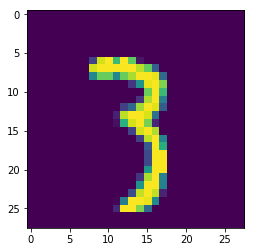

In [19]:
#display the image
plt.imshow(batch_x1.reshape(28,28))

In [20]:
label=tf.argmax(input=batch_y1,axis=1)
print("Label:")
print(sess.run(label))

Label:
[3]


In [21]:
#run inference
mymax=tf.argmax(input=y,axis=1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:batch_x1}))


Predicted value:
[3]


In [22]:
saver = tf.compat.v1.train.Saver()

In [23]:
save_path = saver.save(sess, "my_net/save_net.ckpt")
print("Save to path: ", save_path)

Save to path:  my_net/save_net.ckpt


In [24]:
sess.close()